In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 10]

In [2]:
crashes=pd.read_csv('NYPD_Motor_Vehicle_Collisions_-_Crashes_in_2018.csv')

In [3]:
crashes.head(300)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/07/2018,4:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493 BRUCKNER BOULEVARD,...,Unspecified,NaN,NaN,NaN,4025433,Sedan,NaN,NaN,NaN,NaN
1,01/07/2018,12:14,BROOKLYN,11235.0,40.592773,-73.949900,"(40.592773, -73.9499)",NaN,NaN,2014 AVENUE X,...,Backing Unsafely,NaN,NaN,NaN,4063065,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,01/07/2018,14:45,NaN,NaN,40.742016,-73.839820,"(40.742016, -73.83982)",L.I.E / G.C.P CDR,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3824411,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,01/07/2018,11:00,BRONX,10467.0,40.883667,-73.866356,"(40.883667, -73.866356)",NaN,NaN,3750 BRONX BOULEVARD,...,NaN,NaN,NaN,NaN,3825989,AM,NaN,NaN,NaN,NaN
4,01/07/2018,9:50,NaN,NaN,NaN,NaN,NaN,GLEASON AVENUE,OLMSTEAD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3823612,SPORT UTILITY / STATION WAGON,GG,NaN,NaN,NaN
5,01/07/2018,8:45,NaN,NaN,40.752240,-73.820854,"(40.75224, -73.820854)",KISSENA BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3824206,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
6,01/07/2018,8:30,BROOKLYN,11226.0,40.654457,-73.960785,"(40.654457, -73.960785)",WOODRUFF AVENUE,EAST 21 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3824030,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
7,01/07/2018,7:00,NaN,NaN,NaN,NaN,NaN,VANSICLEN STREET,131 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3824877,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
8,01/07/2018,11:57,QUEENS,11378.0,40.714300,-73.909490,"(40.7143, -73.90949)",NaN,NaN,61-01 55 STREET,...,NaN,NaN,NaN,NaN,3827487,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
9,01/07/2018,0:00,BROOKLYN,11207.0,40.659930,-73.891655,"(40.65993, -73.891655)",HEGEMAN AVENUE,PENNSYLVANIA AVENUE,NaN,...,NaN,NaN,NaN,NaN,3823900,PICK-UP TRUCK,NaN,NaN,NaN,NaN


In [4]:
crashes.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,146874.000000,213065.000000,213065.000000,228013.000000,228004.000000,228017.000000,228017.000000,228017.000000,228017.000000,228017.000000,228017.000000,2.280170e+05
mean,10855.002138,40.667962,-73.838348,0.268362,0.000991,0.048124,0.000526,0.020621,0.000044,0.199494,0.000421,3.939524e+06
std,549.624313,1.513832,3.196813,0.656351,0.031883,0.223471,0.023314,0.143403,0.006622,0.621569,0.020727,6.684431e+04
min,10000.000000,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.511951e+06
25%,10312.000000,40.667313,-73.974910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.881895e+06
50%,11208.000000,40.720726,-73.925230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939008e+06
75%,11249.000000,40.770710,-73.863434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.996111e+06
max,11697.000000,41.124210,0.000000,22.000000,2.000000,6.000000,2.000000,2.000000,1.000000,21.000000,2.000000,4.204105e+06


In [5]:
crashes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228017 entries, 0 to 228016
Data columns (total 29 columns):
DATE                             228017 non-null object
TIME                             228017 non-null object
BOROUGH                          146913 non-null object
ZIP CODE                         146874 non-null float64
LATITUDE                         213065 non-null float64
LONGITUDE                        213065 non-null float64
LOCATION                         213065 non-null object
ON STREET NAME                   173217 non-null object
CROSS STREET NAME                113226 non-null object
OFF STREET NAME                  54091 non-null object
NUMBER OF PERSONS INJURED        228013 non-null float64
NUMBER OF PERSONS KILLED         228004 non-null float64
NUMBER OF PEDESTRIANS INJURED    228017 non-null int64
NUMBER OF PEDESTRIANS KILLED     228017 non-null int64
NUMBER OF CYCLIST INJURED        228017 non-null int64
NUMBER OF CYCLIST KILLED         228017 non-null

In [6]:
crashes['TIME OF ACCIDENT']=pd.to_datetime(crashes['TIME'])
crashes.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME OF ACCIDENT
0,01/07/2018,4:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493 BRUCKNER BOULEVARD,...,NaN,NaN,NaN,4025433,Sedan,NaN,NaN,NaN,NaN,2019-12-12 04:30:00
1,01/07/2018,12:14,BROOKLYN,11235.0,40.592773,-73.949900,"(40.592773, -73.9499)",NaN,NaN,2014 AVENUE X,...,NaN,NaN,NaN,4063065,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019-12-12 12:14:00
2,01/07/2018,14:45,NaN,NaN,40.742016,-73.839820,"(40.742016, -73.83982)",L.I.E / G.C.P CDR,NaN,NaN,...,NaN,NaN,NaN,3824411,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2019-12-12 14:45:00
3,01/07/2018,11:00,BRONX,10467.0,40.883667,-73.866356,"(40.883667, -73.866356)",NaN,NaN,3750 BRONX BOULEVARD,...,NaN,NaN,NaN,3825989,AM,NaN,NaN,NaN,NaN,2019-12-12 11:00:00
4,01/07/2018,9:50,NaN,NaN,NaN,NaN,NaN,GLEASON AVENUE,OLMSTEAD AVENUE,NaN,...,NaN,NaN,NaN,3823612,SPORT UTILITY / STATION WAGON,GG,NaN,NaN,NaN,2019-12-12 09:50:00


In [7]:
crashes.isna().sum()

DATE                                  0
TIME                                  0
BOROUGH                           81104
ZIP CODE                          81143
LATITUDE                          14952
LONGITUDE                         14952
LOCATION                          14952
ON STREET NAME                    54800
CROSS STREET NAME                114791
OFF STREET NAME                  173926
NUMBER OF PERSONS INJURED             4
NUMBER OF PERSONS KILLED             13
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       683
CONTRIBUTING FACTOR VEHICLE 2     34261
CONTRIBUTING FACTOR VEHICLE 3    213557
CONTRIBUTING FACTOR VEHICLE 4    225018
CONTRIBUTING FACTOR VEHICLE 5    227216
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1377


 There exist empty columns in my dataset like BOROUGH, ZIP CODE, LATITUDE, LOCATION. However, What call the attention about the missing data is that BOROUGH and ZIP CODE are missing  35 percent of its data. Another large percent of missing date is at columns  ON STREET NAME where the approximately 24 percent of its data is missing.  

In [8]:
crashes_n_na=crashes


In [9]:
zipcodes=crashes_n_na['BOROUGH'].value_counts()

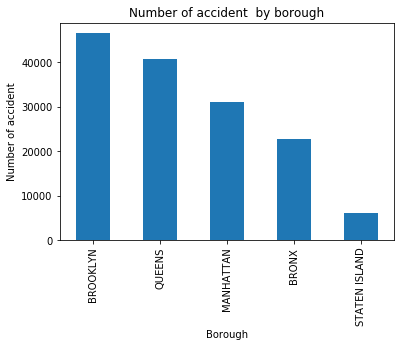

In [10]:
zipcodes.plot.bar()
plt.title('Number of accident  by borough')
plt.xlabel('Borough')
plt.ylabel('Number of accident')
plt.show()


Text(0, 0.5, 'Number of accidents')

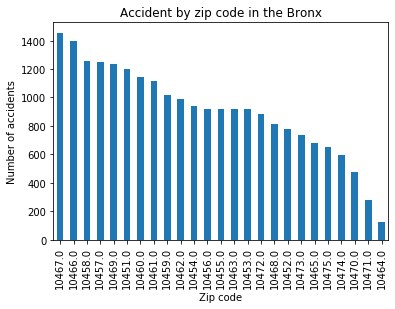

In [11]:
bronx_filter=crashes_n_na['BOROUGH']=='BRONX'
bronx=crashes_n_na[bronx_filter]
bronx_fil=bronx['ZIP CODE'].value_counts()
bronx_fil.plot.bar()
plt.title('Accident by zip code in the Bronx')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')

Text(0, 0.5, 'Number of accidents')

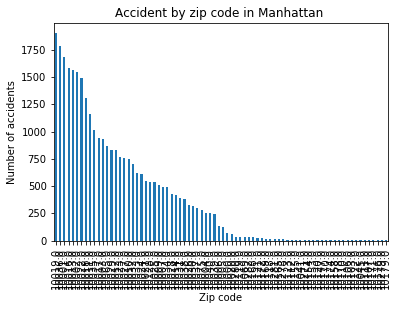

In [12]:
manha_filter=crashes_n_na['BOROUGH']=='MANHATTAN'
manha=crashes[manha_filter]
zip_code_manha=manha['ZIP CODE'].value_counts()
zip_code_manha[zip_code_manha>-1].plot.bar()
 
plt.title('Accident by zip code in Manhattan ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')

Text(0, 0.5, 'Number of accidents')

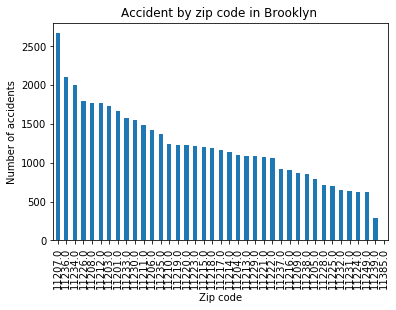

In [13]:
brook_filter=crashes_n_na['BOROUGH']=='BROOKLYN'
brook=crashes_n_na[brook_filter]
zip_code_brook=brook['ZIP CODE'].value_counts()
zip_code_brook.plot.bar()
plt.title('Accident by zip code in Brooklyn ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')

11207.0    2667
11236.0    2111
11234.0    1998
11226.0    1790
11208.0    1768
11212.0    1766
11203.0    1735
11201.0    1661
11233.0    1579
11230.0    1547
11211.0    1483
11206.0    1428
11235.0    1371
11210.0    1245
11219.0    1232
11220.0    1223
11223.0    1219
11215.0    1203
11218.0    1188
11217.0    1162
11214.0    1141
11204.0    1104
11213.0    1082
11229.0    1081
11221.0    1072
11222.0    1063
11237.0     920
11216.0     907
11209.0     867
11238.0     859
11205.0     797
11228.0     720
11225.0     707
11232.0     655
11231.0     639
11224.0     630
11249.0     627
11239.0     294
11385.0       4
Name: ZIP CODE, dtype: int64

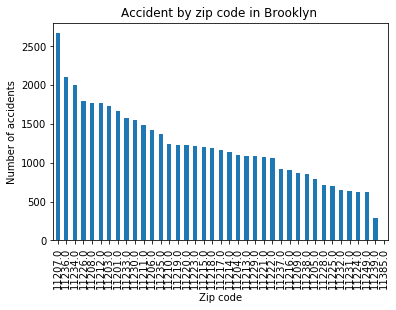

In [14]:
brook_filter=(crashes_n_na['BOROUGH']=='BROOKLYN')
brook=crashes_n_na[brook_filter]
zip_code_brook=brook['ZIP CODE'].value_counts()
zip_code_brook.plot.bar()
plt.title('Accident by zip code in Brooklyn ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')
zip_code_brook

Text(0, 0.5, 'Number of accidents')

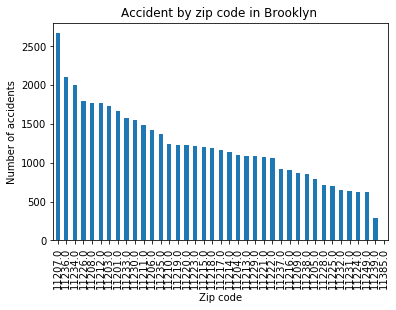

In [15]:
brook_filter=crashes_n_na['BOROUGH']=='BROOKLYN'
brook=crashes_n_na[brook_filter]
zip_code_brook=brook['ZIP CODE'].value_counts()
zip_code_brook[zip_code_brook>-1].plot.bar()
plt.title('Accident by zip code in Brooklyn ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME OF ACCIDENT
8,01/07/2018,11:57,QUEENS,11378.0,40.714300,-73.909490,"(40.7143, -73.90949)",NaN,NaN,61-01 55 STREET,...,NaN,NaN,NaN,3827487,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2019-12-12 11:57:00
24,01/07/2018,10:35,QUEENS,11373.0,40.736042,-73.876710,"(40.736042, -73.87671)",NaN,NaN,86-46 QUEENS BOULEVARD,...,NaN,NaN,NaN,3823957,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2019-12-12 10:35:00
31,01/07/2018,11:45,QUEENS,11379.0,40.727837,-73.874710,"(40.727837, -73.87471)",NaN,NaN,84-40 60 DRIVE,...,NaN,NaN,NaN,3834967,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2019-12-12 11:45:00
40,01/07/2018,14:00,QUEENS,11367.0,40.723343,-73.820045,"(40.723343, -73.820045)",MAIN STREET,75 ROAD,NaN,...,NaN,NaN,NaN,3824585,BU,TK,NaN,NaN,NaN,2019-12-12 14:00:00
42,01/07/2018,18:00,QUEENS,11422.0,40.665610,-73.735680,"(40.66561, -73.73568)",SUNRISE HIGHWAY,FRANCIS LEWIS BOULEVARD,NaN,...,NaN,NaN,NaN,3823774,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2019-12-12 18:00:00


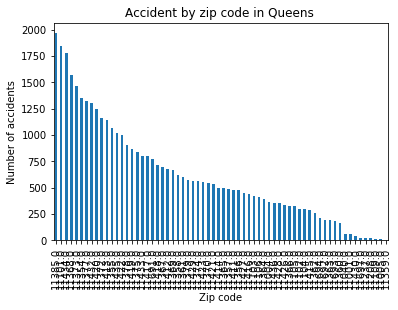

In [16]:
que_filter=crashes_n_na['BOROUGH']=='QUEENS'
que=crashes_n_na[que_filter]
zip_code_que=que['ZIP CODE'].value_counts()

zip_code_que.plot.bar()

plt.title('Accident by zip code in Queens ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')
que.head()

Text(0, 0.5, 'Number of accidents')

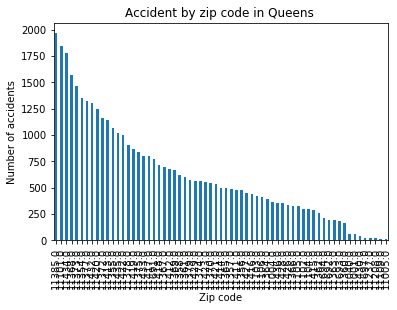

In [17]:
que_filter=crashes_n_na['BOROUGH']=='QUEENS'
que=crashes_n_na[que_filter]
zip_code_que=que['ZIP CODE'].value_counts()
 
zip_code_que[zip_code_que>1].plot.bar()

plt.title('Accident by zip code in Queens ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')
 

10306.0    1078
10304.0     881
10301.0     850
10312.0     785
10305.0     706
Name: ZIP CODE, dtype: int64

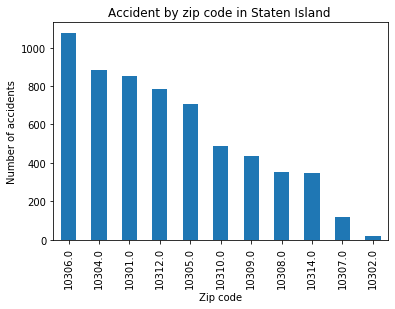

In [18]:
state_filter=crashes_n_na['BOROUGH']=='STATEN ISLAND'
state=crashes[state_filter]
zip_code_state=state['ZIP CODE'].value_counts()
zip_code_state.plot.bar()
plt.title('Accident by zip code in Staten Island ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')
zip_code_state.head()



In [19]:
crashes_by_hour=crashes_n_na.groupby(crashes_n_na['TIME OF ACCIDENT'].dt.hour)
crashes_by_hour.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME OF ACCIDENT
0,01/07/2018,4:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493 BRUCKNER BOULEVARD,...,NaN,NaN,NaN,4025433,Sedan,NaN,NaN,NaN,NaN,2019-12-12 04:30:00
1,01/07/2018,12:14,BROOKLYN,11235.0,40.592773,-73.949900,"(40.592773, -73.9499)",NaN,NaN,2014 AVENUE X,...,NaN,NaN,NaN,4063065,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019-12-12 12:14:00
2,01/07/2018,14:45,NaN,NaN,40.742016,-73.839820,"(40.742016, -73.83982)",L.I.E / G.C.P CDR,NaN,NaN,...,NaN,NaN,NaN,3824411,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2019-12-12 14:45:00
3,01/07/2018,11:00,BRONX,10467.0,40.883667,-73.866356,"(40.883667, -73.866356)",NaN,NaN,3750 BRONX BOULEVARD,...,NaN,NaN,NaN,3825989,AM,NaN,NaN,NaN,NaN,2019-12-12 11:00:00
4,01/07/2018,9:50,NaN,NaN,NaN,NaN,NaN,GLEASON AVENUE,OLMSTEAD AVENUE,NaN,...,NaN,NaN,NaN,3823612,SPORT UTILITY / STATION WAGON,GG,NaN,NaN,NaN,2019-12-12 09:50:00
5,01/07/2018,8:45,NaN,NaN,40.752240,-73.820854,"(40.75224, -73.820854)",KISSENA BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,3824206,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2019-12-12 08:45:00
6,01/07/2018,8:30,BROOKLYN,11226.0,40.654457,-73.960785,"(40.654457, -73.960785)",WOODRUFF AVENUE,EAST 21 STREET,NaN,...,NaN,NaN,NaN,3824030,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2019-12-12 08:30:00
7,01/07/2018,7:00,NaN,NaN,NaN,NaN,NaN,VANSICLEN STREET,131 STREET,NaN,...,NaN,NaN,NaN,3824877,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2019-12-12 07:00:00
8,01/07/2018,11:57,QUEENS,11378.0,40.714300,-73.909490,"(40.7143, -73.90949)",NaN,NaN,61-01 55 STREET,...,NaN,NaN,NaN,3827487,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2019-12-12 11:57:00
9,01/07/2018,0:00,BROOKLYN,11207.0,40.659930,-73.891655,"(40.65993, -73.891655)",HEGEMAN AVENUE,PENNSYLVANIA AVENUE,NaN,...,NaN,NaN,NaN,3823900,PICK-UP TRUCK,NaN,NaN,NaN,NaN,2019-12-12 00:00:00


In [20]:
values=crashes_by_hour['NUMBER OF PERSONS INJURED']
values.head()

0      1.0
1      1.0
2      3.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      1.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     1.0
19     0.0
20     0.0
21     0.0
22     1.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     1.0
29     1.0
      ... 
114    0.0
122    0.0
124    1.0
125    0.0
135    0.0
139    0.0
141    1.0
149    0.0
151    0.0
158    0.0
165    0.0
171    1.0
177    0.0
180    0.0
189    0.0
202    0.0
206    0.0
209    1.0
226    0.0
232    0.0
241    0.0
246    0.0
249    0.0
283    0.0
286    0.0
295    0.0
415    0.0
420    0.0
443    0.0
639    0.0
Name: NUMBER OF PERSONS INJURED, Length: 120, dtype: float64

Text(0, 0.5, 'Injureies')

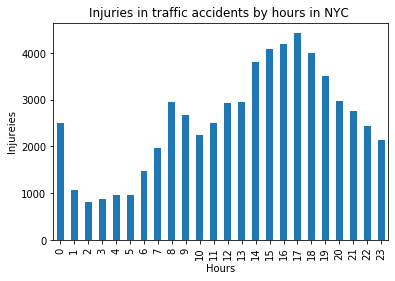

In [21]:
number_of_people_inju=values.sum()
number_of_people_inju.plot.bar()
plt.title('Injuries in traffic accidents by hours in NYC ')
plt.xlabel('Hours')
plt.ylabel('Injureies')
 

Text(0, 0.5, 'Number of deaths')

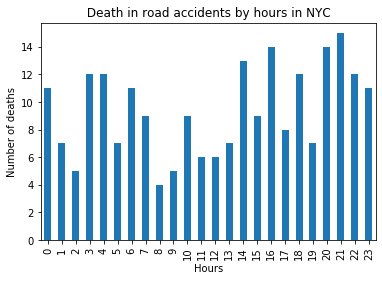

In [22]:
num_of_people_kill=crashes_by_hour['NUMBER OF PERSONS KILLED'].sum()

num_of_people_kill.plot.bar()
plt.title(' Death in road accidents by hours in NYC ')
plt.xlabel('Hours')
plt.ylabel('Number of deaths')

In [23]:
crashes['NUMBER OF PERSONS KILLED'].sum()

226.0

In [24]:
 accident_by_hours=crashes.groupby([crashes['TIME OF ACCIDENT'].dt.hour]).size()


In [25]:
 accident_by_hours

TIME OF ACCIDENT
0      7967
1      3396
2      2443
3      2245
4      2608
5      3001
6      5194
7      7374
8     12738
9     12348
10    11178
11    11905
12    12680
13    13109
14    15661
15    15030
16    16830
17    16658
18    14270
19    11481
20     9175
21     7815
22     7019
23     5892
dtype: int64

Text(0.5, 1.0, 'Accident on the  Bronx by  Zip code')

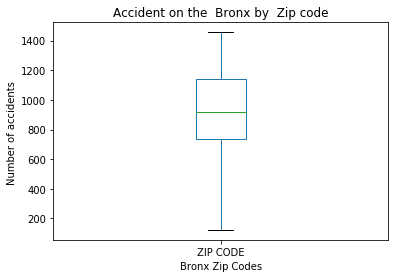

In [26]:
bronx_fil.plot.box()
plt.xlabel('Bronx Zip Codes')
plt.ylabel('Number of accidents ')
plt.title('Accident on the  Bronx by  Zip code')

10019.0    1899
10036.0    1788
10001.0    1686
10016.0    1579
10013.0    1564
10002.0    1548
10022.0    1487
10018.0    1309
10011.0    1158
10035.0    1014
10017.0     938
10003.0     928
10065.0     871
10029.0     828
10012.0     827
10023.0     764
10027.0     755
10010.0     751
10032.0     705
10033.0     623
10024.0     607
10021.0     545
10128.0     536
10025.0     535
10009.0     505
10007.0     495
10034.0     492
10028.0     426
10014.0     420
10031.0     390
           ... 
10172.0      21
10169.0      16
10118.0      12
10281.0      12
10165.0      11
10278.0      11
10123.0       8
10112.0       6
10155.0       6
10041.0       5
10271.0       4
10154.0       4
10153.0       3
10120.0       3
10177.0       3
10170.0       3
10174.0       2
10158.0       2
10178.0       2
10110.0       2
10106.0       2
10103.0       2
10122.0       1
10045.0       1
10111.0       1
10107.0       1
10171.0       1
10176.0       1
10279.0       1
10179.0       1
Name: ZIP CODE, Length: 

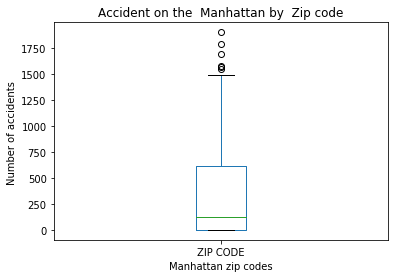

In [27]:
zip_code_manha.plot.box()
plt.xlabel('Manhattan zip codes')
plt.ylabel('Number of accidents ')
plt.title('Accident on the  Manhattan by  Zip code')
zip_code_manha

In [28]:
zip_code_manha[zip_code_manha>1500]

10019.0    1899
10036.0    1788
10001.0    1686
10016.0    1579
10013.0    1564
10002.0    1548
Name: ZIP CODE, dtype: int64

Text(0.5, 1.0, 'Accident on the  Brooklyn by  Zip code')

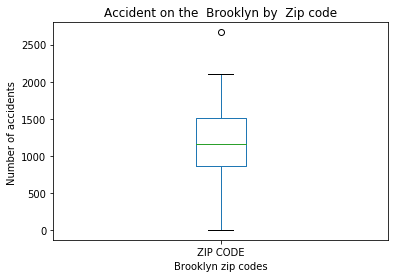

In [29]:
zip_code_brook.plot.box()
plt.xlabel('Brooklyn zip codes')
plt.ylabel('Number of accidents ')
plt.title('Accident on the  Brooklyn by  Zip code')


Text(0.5, 1.0, 'Accident on the Queens by  Zip code')

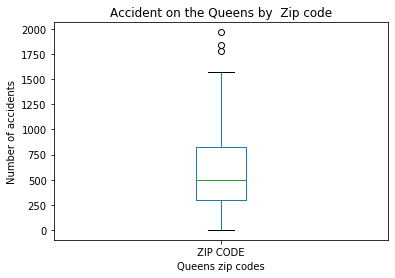

In [30]:
zip_code_que.plot.box()
plt.xlabel('Queens zip codes')
plt.ylabel('Number of accidents')
plt.title('Accident on the Queens by  Zip code')

Text(0.5, 1.0, 'Accident on  Staten Island by  Zip code')

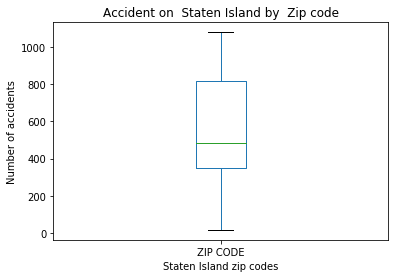

In [31]:
zip_code_state.plot.box()
plt.xlabel('Staten Island zip codes')
plt.ylabel('Number of accidents')
plt.title('Accident on  Staten Island by  Zip code')

Text(0, 0.5, ' Number injuries ')

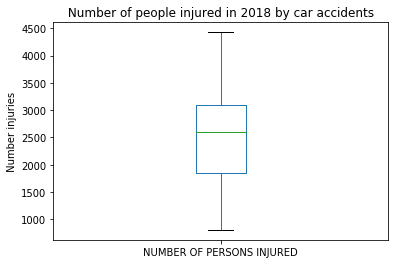

In [32]:
number_of_people_inju.plot.box()
plt.title (' Number of people injured in 2018 by car accidents ')
plt.ylabel(' Number injuries ')

Text(0, 0.5, ' Number  of deaths ')

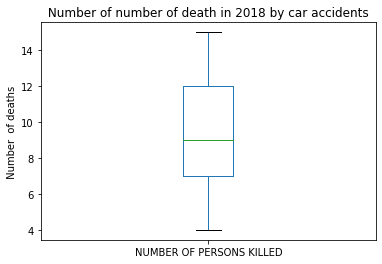

In [33]:
num_of_people_kill.plot.box()
plt.title (' Number of number of death in 2018 by car accidents ')
plt.ylabel(' Number  of deaths ')

Text(0, 0.5, 'Number of accidents')

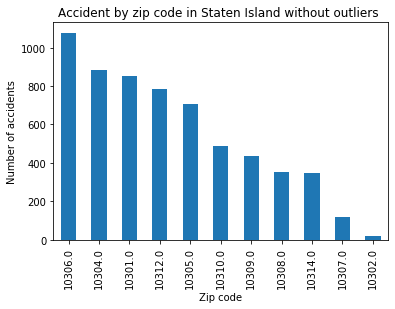

In [34]:
#outline removed
zip_code_state[zip_code_state>0].plot.bar()
plt.title('Accident by zip code in Staten Island without outliers ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')
#long island
# Fort Totten Park  does not get  a lot traffic because it is closed to car .

In [35]:
 df = pd.DataFrame({'hours':number_of_people_inju.index, 'count_inju':number_of_people_inju.values, "count_kill":num_of_people_kill.values, "accident_by_hour": accident_by_hours})

In [36]:
crash=crashes[crashes['ZIP CODE'] !='11359 '] ## droped one outlier

C:\Users\789\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0, 0.5, 'Number of deaths')

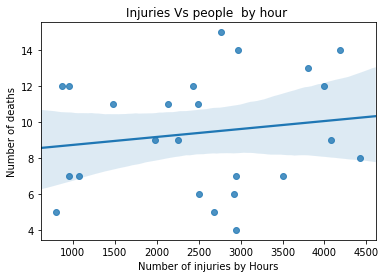

In [37]:
sns.regplot(x='count_inju',y='count_kill', data=df)
plt.title("Injuries Vs people  by hour ")
plt.xlabel("Number of injuries by Hours")
plt.ylabel("Number of deaths")

Text(0, 0.5, 'Number of People Killed')

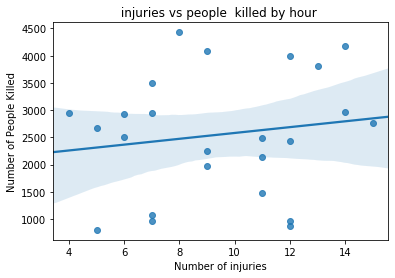

In [38]:
sns.regplot(y='count_inju',x='count_kill', data=df)
plt.title(' injuries vs people  killed by hour  ')
plt.xlabel("Number of injuries")
plt.ylabel("Number of People Killed")
    


Text(0, 0.5, 'Injurie by hours')

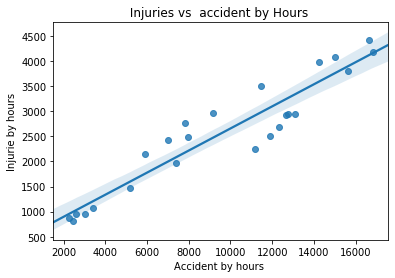

In [39]:
sns.regplot(y='count_inju',x='accident_by_hour', data=df)
plt.title(' Injuries vs  accident by Hours  ')
plt.xlabel("Accident by hours ")
plt.ylabel("Injurie by hours")
    

Text(0, 0.5, 'Number of People Killed')

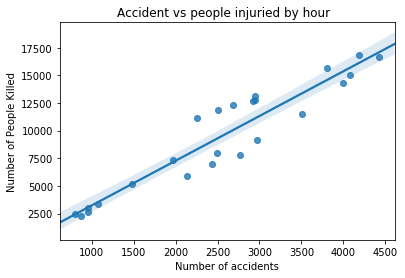

In [40]:
sns.regplot(x='count_inju',y='accident_by_hour', data=df)
plt.title('Accident vs people injuried by hour  ')
plt.xlabel("Number of accidents")
plt.ylabel("Number of People Killed")
    
 


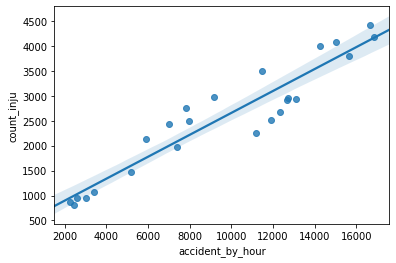

In [41]:
sns.regplot(y='count_inju',x='accident_by_hour', data=df)
               

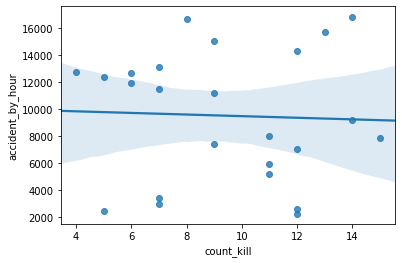

In [42]:
sns.regplot(x='count_kill',y='accident_by_hour', data=df)


Text(0, 0.5, 'Number of People Killed')

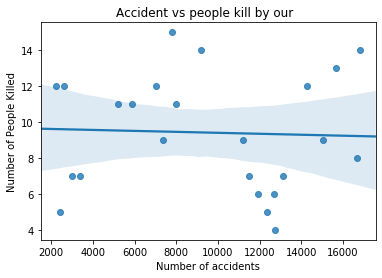

In [43]:
sns.regplot(y='count_kill',x='accident_by_hour', data=df)
plt.title('Accident vs people kill by our  ')
plt.xlabel("Number of accidents")
plt.ylabel("Number of People Killed")

In [44]:
crashes_n_na.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'TIME OF ACCIDENT'],
      dtype='object')

In [45]:
group_by_zipcode=crashes.groupby('ZIP CODE')

In [46]:
accident_by_all_zipcodes=group_by_zipcode['DATE'].size()


In [47]:
injuries_by_all_zipcodes=group_by_zipcode['NUMBER OF PERSONS INJURED'].sum()

In [48]:
accident_by_all_zipcodes

ZIP CODE
10000.0      65
10001.0    1686
10002.0    1548
10003.0     928
10004.0     253
10005.0     123
10006.0     136
10007.0     495
10009.0     505
10010.0     751
10011.0    1158
10012.0     827
10013.0    1564
10014.0     420
10016.0    1579
10017.0     938
10018.0    1309
10019.0    1899
10020.0      58
10021.0     545
10022.0    1487
10023.0     764
10024.0     607
10025.0     535
10026.0     324
10027.0     755
10028.0     426
10029.0     828
10030.0     321
10031.0     390
           ... 
11379.0     573
11385.0    1970
11411.0     483
11412.0     680
11413.0    1142
11414.0     498
11415.0     293
11416.0     444
11417.0     798
11418.0     719
11419.0     868
11420.0    1248
11421.0     540
11422.0     999
11423.0     555
11426.0     335
11427.0     453
11428.0     352
11429.0     563
11430.0      39
11432.0    1306
11433.0     803
11434.0    1781
11435.0    1016
11436.0     359
11691.0     773
11692.0     198
11693.0     183
11694.0     210
11697.0      24
Name: DATE, Len

In [49]:
accident_by_all_zipcodes.head().size


5

In [50]:
injuries_by_all_zipcodes.size

216

In [51]:
df_by_zipcode = pd.DataFrame({'zipcode':accident_by_all_zipcodes.index, 'accidents':accident_by_all_zipcodes.values,"accident_by_zipcode": accident_by_all_zipcodes.values, 'injuries':injuries_by_all_zipcodes.values})

In [52]:
df_by_zipcode.shape

(216, 4)

Text(0, 0.5, 'Number  accidents ')

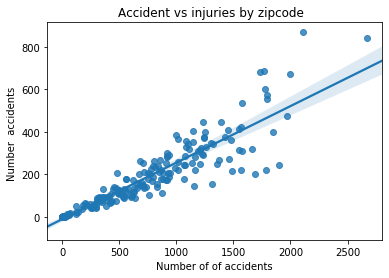

In [53]:
sns.regplot(y='injuries',x='accident_by_zipcode', data=df_by_zipcode)
plt.title('Accident vs injuries by zipcode  ')
plt.xlabel("Number of of accidents")
plt.ylabel("Number  accidents ")

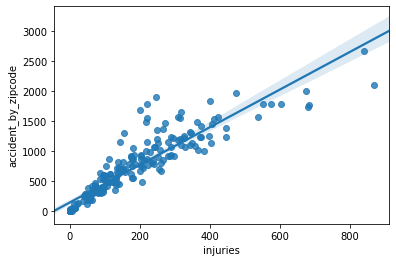

In [54]:
sns.regplot(x='injuries',y='accident_by_zipcode', data=df_by_zipcode)

Text(0, 0.5, 'Number of accidents')

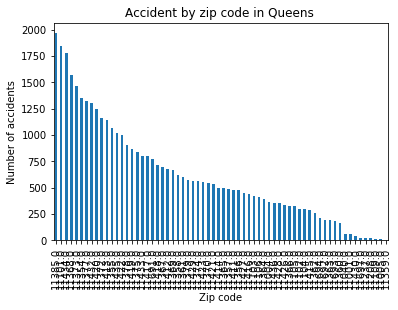

In [55]:
que_filter=(crashes_n_na['BOROUGH']=='QUEENS') &(crashes_n_na['BOROUGH']=='QUEENS')
que=crashes_n_na[que_filter]
zip_code_que=que['ZIP CODE'].value_counts()
zip_code_que.plot.bar()
plt.title('Accident by zip code in Queens ')
plt.xlabel('Zip code')
plt.ylabel('Number of accidents')

In [56]:
crashes['CONTRIBUTING FACTOR VEHICLE 1']

0           Driver Inattention/Distraction
1                    Following Too Closely
2           Driver Inattention/Distraction
3                        Oversized Vehicle
4           Driver Inattention/Distraction
5                    Following Too Closely
6                      Passing Too Closely
7           Passing or Lane Usage Improper
8                              Unspecified
9                              Unspecified
10                             Unspecified
11                             Unspecified
12          Driver Inattention/Distraction
13                        Backing Unsafely
14                             Unspecified
15                   Following Too Closely
16                   Following Too Closely
17                   Following Too Closely
18          Driver Inattention/Distraction
19          Driver Inattention/Distraction
20          Driver Inattention/Distraction
21                   Following Too Closely
22          Driver Inattention/Distraction
23         

In [57]:
crashes.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'TIME OF ACCIDENT'],
      dtype='object')

In [58]:
 dat

NameError: name 'dat' is not defined

In [ ]:
 df_by_zipcode

In [ ]:
df_by_zipcode

In [ ]:
lm = smf.ols("injuries ~ accidents",data = df_by_zipcode).fit()
lm.summary()

y=-11.1664+0.2660*X

In [ ]:
df_by_zipcode

In [ ]:
sns.relplot(x=df_by_zipcode['accidents'],y=lm.resid)

In [ ]:
(lm.resid**2).mean()

In [ ]:
crashes_n_na.head()

In [ ]:
zipcode

In [ ]:
df_by_zipcode

In [ ]:
features=df_by_zipcode
features=features.drop(columns=['injuries','accident_by_zipcode'])

injuries=df_by_zipcode['injuries']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(features,injuries, test_size=0.2)

In [ ]:
reg_train = tree.DecisionTreeRegressor(max_depth = 4)
reg_predict = reg_train.fit(X_train, y_train)

In [ ]:
s=reg_predict.fit(X_test, y_test)
print(tree.export_graphviz(s))

In [ ]:
 X_train